Project -
<br> I plan on exploring the inflation rate using data from the previous 3 years. From these data-sets, I will be able to derive what the drivers of inflation have been as well as having an understanding of what the likely state of inflation will be in the near future. 
<br> The data-sets that I will be using are from ONS (linked at the bottom of this notebook). I will be assessing the UK CPIH (Consumer Price Index including Owner Occupiers' Housing Costs), which is the most comprehensive measure of inflation.
<br> Additionally, I hope to align the CPIH inflation data-set with another ONS source which tracks household's saving ratio (%). I would like to assess what the impact of covid has been on an individual's saving rate and whether the rising inflation has caused any shift in individual's saving behaviour. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = r'/Users/jameshawkins/Documents/projects/uk_inflation_project/raw_data.xlsx'

In [3]:
# Ingesting file filtering out CPIH data to use
cpih_raw = pd.read_excel(file, sheet_name='Sheet1', header=10, skiprows=3, usecols=['Unnamed: 1', 'L522','L55O'])

In [4]:
cpih_raw.head()

,Unnamed: 1,L522,L55O
0,Dec 2018,107.1,2.0
1,Jan 2019,106.4,1.8
2,Feb 2019,106.8,1.8
3,Mar 2019,107.0,1.8
4,Apr 2019,107.6,2.0


In [5]:
# Renaming data-set column names, CPIH is indexed from 2015 = 100
cpih_raw.rename({'Unnamed: 1':'Date', 'L522':'CPIH Value', 'L55O':'% Change over 12 Months'}, axis=1, inplace=True)
cpih_raw.head()

,Date,CPIH Value,% Change over 12 Months
0,Dec 2018,107.1,2.0
1,Jan 2019,106.4,1.8
2,Feb 2019,106.8,1.8
3,Mar 2019,107.0,1.8
4,Apr 2019,107.6,2.0


In [6]:
# Change dates to clearer date time format
cpih_raw['Date'] = pd.to_datetime(cpih_raw['Date'])

In [7]:
cpih_raw.set_index('Date')

,CPIH Value,% Change over 12 Months
Date,,
2018-12-01,107.1,2.0
2019-01-01,106.4,1.8
2019-02-01,106.8,1.8
2019-03-01,107.0,1.8
2019-04-01,107.6,2.0
2019-05-01,107.9,1.9
2019-06-01,107.9,1.9
2019-07-01,108.0,2.0
2019-08-01,108.3,1.7


***

In [8]:
# Ingesting CPIH Data broken down by division (COICOP) 
# This data represents year on year percentage change of CPIH across all divisons 
cpih_division = pd.read_excel(file, sheet_name='Sheet2', header=44, usecols='B:O')

In [9]:
cpih_division.head()

,Unnamed: 1,L55P,L55Q,L55R,L55S,L55T,L55U,L55V,L55W,L55X,L55Y,L55Z,L562,L55O
0,Dec 2019,1.7,1.5,-0.8,1.2,1.5,2.8,0.7,4.3,1.4,2.7,1.6,2.1,1.4
1,Jan 2020,1.4,1.5,0.3,1.9,0.4,2.8,1.8,4.2,1.4,2.7,2.2,2.4,1.8
2,Feb 2020,1.3,0.7,0.2,1.8,0.2,3.0,1.9,4.5,1.4,2.7,2.5,2.4,1.7
3,Mar 2020,1.3,1.4,-1.2,1.7,0.1,3.2,1.3,5.0,1.2,2.7,2.1,2.4,1.5
4,Apr 2020,1.4,2.6,-2.8,0.5,-0.2,2.3,-0.9,4.2,2.4,2.7,2.4,1.3,0.9


In [10]:
# Renaming data-set column names 
cpih_division.columns = ['Date','Food and Non-Alcoholic Beverages','Alcoholic Beverages & Tobacco', 
                         'Clothing and Footwear','Housing, Water, Electricity & Other Fuels', 
                         'Furniture, Household Equipment & Routine Maintenance',
                         'Health', 'Transport', 'Communication','Recreation & Culture',
                         'Education','Restaurants & Hotels',
                         'Miscellaneous Goods and Services','CPIH (Overall Index)']

In [11]:
cpih_division['Date'] = pd.to_datetime(cpih_division['Date'])
cpih_division.set_index('Date')
cpih_division.head()

,Date,Food and Non-Alcoholic Beverages,Alcoholic Beverages & Tobacco,Clothing and Footwear,"Housing, Water, Electricity & Other Fuels","Furniture, Household Equipment & Routine Maintenance",Health,Transport,Communication,Recreation & Culture,Education,Restaurants & Hotels,Miscellaneous Goods and Services,CPIH (Overall Index)
0,2019-12-01,1.7,1.5,-0.8,1.2,1.5,2.8,0.7,4.3,1.4,2.7,1.6,2.1,1.4
1,2020-01-01,1.4,1.5,0.3,1.9,0.4,2.8,1.8,4.2,1.4,2.7,2.2,2.4,1.8
2,2020-02-01,1.3,0.7,0.2,1.8,0.2,3.0,1.9,4.5,1.4,2.7,2.5,2.4,1.7
3,2020-03-01,1.3,1.4,-1.2,1.7,0.1,3.2,1.3,5.0,1.2,2.7,2.1,2.4,1.5
4,2020-04-01,1.4,2.6,-2.8,0.5,-0.2,2.3,-0.9,4.2,2.4,2.7,2.4,1.3,0.9


***

In [12]:
# Ingesting final dataset - Household's Savings Ratio (%)
savings = pd.read_excel(file, sheet_name='Sheet3', header=7)
savings

,Date,Households' Saving Ratio
0,2018 Q1,4.8
1,2018 Q2,4.8
2,2018 Q3,4.8
3,2018 Q4,5.5
4,2019 Q1,4.5
5,2019 Q2,4.6
6,2019 Q3,4.5
7,2019 Q4,6.0
8,2020 Q1,6.7
9,2020 Q2,23.7


In [13]:
a=[]
for i in savings['Date']:
    if 'Q1' in i:
        a.append(i[0:4]+'-'+'01'+'-'+'01')
    elif 'Q2' in i:
        a.append(i[0:4]+'-'+'04'+'-'+'01')
    elif 'Q3' in i:
        a.append(i[0:4]+'-'+'07'+'-'+'01')
    else:
        a.append(i[0:4]+'-'+'10'+'-'+'01')
a

['2018-01-01',
 '2018-04-01',
 '2018-07-01',
 '2018-10-01',
 '2019-01-01',
 '2019-04-01',
 '2019-07-01',
 '2019-10-01',
 '2020-01-01',
 '2020-04-01',
 '2020-07-01',
 '2020-10-01',
 '2021-01-01',
 '2021-04-01',
 '2021-07-01']

In [14]:
savings['Date']=a
savings.set_index('Date')
savings.head()

,Date,Households' Saving Ratio
0,2018-01-01,4.8
1,2018-04-01,4.8
2,2018-07-01,4.8
3,2018-10-01,5.5
4,2019-01-01,4.5


In [15]:
savings['Date'] = pd.to_datetime(savings['Date'])
savings.head()

,Date,Households' Saving Ratio
0,2018-01-01,4.8
1,2018-04-01,4.8
2,2018-07-01,4.8
3,2018-10-01,5.5
4,2019-01-01,4.5


Joining Inflation data to quarterly household's saving ratio - want to understand the impact of CPIH increase on individual's saving behaviour
<br> Leaving the NaN values and not imputing due to the fact they are quarterly data points. Could potentially estimate values of Saving Rates between quarters, but would require further analysis.

In [16]:
df = pd.merge(cpih_raw, savings, how='left')
df.set_index('Date')
df

,Date,CPIH Value,% Change over 12 Months,Households' Saving Ratio
0,2018-12-01,107.1,2.0,NaN
1,2019-01-01,106.4,1.8,4.5
2,2019-02-01,106.8,1.8,NaN
3,2019-03-01,107.0,1.8,NaN
4,2019-04-01,107.6,2.0,4.6
5,2019-05-01,107.9,1.9,NaN
6,2019-06-01,107.9,1.9,NaN
7,2019-07-01,108.0,2.0,4.5
8,2019-08-01,108.3,1.7,NaN
9,2019-09-01,108.4,1.7,NaN


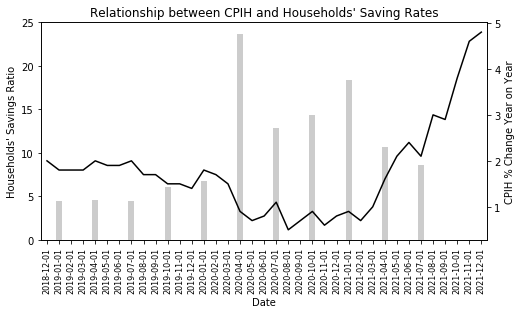

In [69]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("Relationship between CPIH and Households' Saving Rates")
ax2 = ax.twinx()
df.plot(x='Date',y="Households' Saving Ratio", kind='bar', ax=ax, alpha=0.2, color='black')
ax.set_xticklabels(df['Date'].dt.date, fontsize=8)
ax.get_legend().remove()
ax2.plot(ax.get_xticks(), np.asarray(df['% Change over 12 Months']), color='black')
ax.set_ylabel("Households' Savings Ratio")
ax.set_yticks([0,5,10,15,20,25])
ax2.set_ylabel('CPIH % Change Year on Year')

plt.show()

The bar chart represents the quarterly households' savings ratio each quarter, showing a significant jump in savings, starting from Q2 of 2020 (aligning with UK lockdown restrictions). This behaviour seems logical as national lockdown caused individuals to stop spending money. 
<br> The line chart that overlays households' saving rates is the overall CPIH percentage change year on year. Staying consistently lower between 2018 - 2020, as the nation starts to come out of lockdown from the beginning of 2021, there is a sigificant jump in the CPIH rate year on year. 
<br> Concurrently, the households' saving rate begins to drop, suggesting individuals are using more of their disposable income on goods and services.  

***

In [52]:
cpih_division

,Date,Food and Non-Alcoholic Beverages,Alcoholic Beverages & Tobacco,Clothing and Footwear,"Housing, Water, Electricity & Other Fuels","Furniture, Household Equipment & Routine Maintenance",Health,Transport,Communication,Recreation & Culture,Education,Restaurants & Hotels,Miscellaneous Goods and Services,CPIH (Overall Index)
0,2019-12-01,1.7,1.5,-0.8,1.2,1.5,2.8,0.7,4.3,1.4,2.7,1.6,2.1,1.4
1,2020-01-01,1.4,1.5,0.3,1.9,0.4,2.8,1.8,4.2,1.4,2.7,2.2,2.4,1.8
2,2020-02-01,1.3,0.7,0.2,1.8,0.2,3.0,1.9,4.5,1.4,2.7,2.5,2.4,1.7
3,2020-03-01,1.3,1.4,-1.2,1.7,0.1,3.2,1.3,5.0,1.2,2.7,2.1,2.4,1.5
4,2020-04-01,1.4,2.6,-2.8,0.5,-0.2,2.3,-0.9,4.2,2.4,2.7,2.4,1.3,0.9
5,2020-05-01,1.9,2.6,-3.0,0.5,-0.6,0.7,-1.6,4.0,1.8,2.7,2.0,1.2,0.7
6,2020-06-01,1.2,2.1,-2.1,0.6,-0.4,2.2,-1.5,3.9,2.5,2.7,1.8,1.4,0.8
7,2020-07-01,0.8,2.6,0.1,0.6,0.9,3.2,-0.6,4.4,2.4,2.7,1.8,1.5,1.1
8,2020-08-01,0.4,1.9,-1.3,0.7,0.5,2.6,-0.8,4.1,2.7,2.7,-2.8,1.0,0.5
9,2020-09-01,NaN,2.1,-1.4,0.7,-0.4,2.1,1.0,3.4,2.3,2.0,-0.7,0.8,0.7


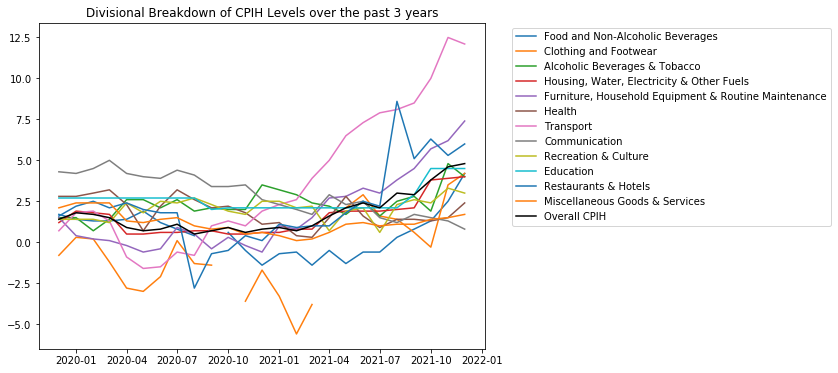

In [63]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(np.asarray(cpih_division['Date']), np.asarray(cpih_division['Food and Non-Alcoholic Beverages']), label='Food and Non-Alcoholic Beverages')
ax.plot(np.asarray(cpih_division['Date']), np.asarray(cpih_division['Clothing and Footwear']), label='Clothing and Footwear')
ax.plot(np.asarray(cpih_division['Date']), np.asarray(cpih_division['Alcoholic Beverages & Tobacco']), label='Alcoholic Beverages & Tobacco')
ax.plot(np.asarray(cpih_division['Date']), np.asarray(cpih_division['Housing, Water, Electricity & Other Fuels']), label='Housing, Water, Electricity & Other Fuels')
ax.plot(np.asarray(cpih_division['Date']), np.asarray(cpih_division['Furniture, Household Equipment & Routine Maintenance']), label='Furniture, Household Equipment & Routine Maintenance')
ax.plot(np.asarray(cpih_division['Date']), np.asarray(cpih_division['Health']), label='Health')
ax.plot(np.asarray(cpih_division['Date']), np.asarray(cpih_division['Transport']), label='Transport')
ax.plot(np.asarray(cpih_division['Date']), np.asarray(cpih_division['Communication']), label='Communication')
ax.plot(np.asarray(cpih_division['Date']), np.asarray(cpih_division['Recreation & Culture']), label='Recreation & Culture')
ax.plot(np.asarray(cpih_division['Date']), np.asarray(cpih_division['Education']), label='Education')
ax.plot(np.asarray(cpih_division['Date']), np.asarray(cpih_division['Restaurants & Hotels']), label='Restaurants & Hotels')
ax.plot(np.asarray(cpih_division['Date']), np.asarray(cpih_division['Miscellaneous Goods and Services']), label='Miscellaneous Goods & Services')
ax.plot(np.asarray(cpih_division['Date']), np.asarray(cpih_division['CPIH (Overall Index)']), label='Overall CPIH', color='black')

plt.title('Divisional Breakdown of CPIH Levels over the past 3 years')
ax.legend(bbox_to_anchor=(1.05, 1))

plt.show()

The divisional data set can provide further insight into what the main drivers of CPIH are. As previously identified, the overall inflation rate has been increasing - moving from the 1/2% from the beginning of 2020 reaching the 5% mark as of the beginning of 2022. 
<br> There have been 3 main divisions that have been significantly influencing the CPIH levels - 'Transport', 'Furniture, Household Equipment & Routine Maintenance' and 'Food and Non-Alocoholic Beverages'. 

Further potential analysis - 
<br> 1. Breaking down savings rates to an individual level - bucketing those most affected by the increase in inflation rate e.g. income bracket, age
<br> 2. Projecting future inflation rates at a divisional level
<br>
<br> Data Sources:
<br> Individual Savings Rate : https://www.ons.gov.uk/economy/grossdomesticproductgdp/timeseries/dgd8/ukea
<br> CPIH Data : https://www.ons.gov.uk/economy/inflationandpriceindices/datasets/consumerpriceinflation
<br> Methodology : https://www.ons.gov.uk/economy/inflationandpriceindices/methodologies/consumerpriceinflationincludesall3indicescpihcpiandrpiqmi